In [1]:
#tensorflow 2.0 has some issue with GPU backend, prolly need to reinstall cuda drivers 
#trying native keras with tf 1.9 backend and pil 5.0

     |████████████████████████████████| 17.3MB 2.9MB/s eta 0:00:01


In [77]:
import keras

In [78]:
import numpy as np

In [3]:
np.__version__

'1.15.0'

In [79]:
import os, shutil

In [12]:
data_dir = '/mnt/data/ppaudyal/cats_and_dogs_small'
#os.listdir(data_dir)

In [80]:
from keras import layers, models, optimizers

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'], loss='binary_crossentropy')

In [81]:
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
validation_dir = os.path.join(data_dir, 'validation')

In [10]:
ImageDataGenerator = keras.preprocessing.image.ImageDataGenerator

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
for data_batch, labels_batch in train_generator:
  print('data shape:', data_batch.shape)
  print('labels shape:', labels_batch.shape)
  break

data shape: (20, 150, 150, 3)
labels shape: (20,)


In [14]:
import matplotlib.pyplot as plt

In [15]:
%matplotlib inline

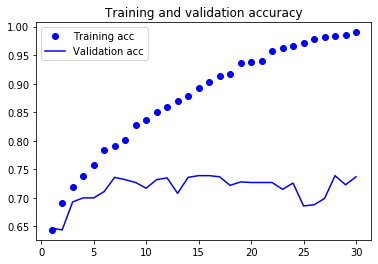

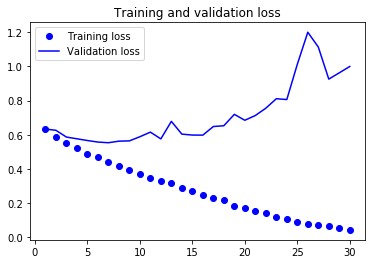

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1 )
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [34]:
#trying image augmentation techniques
datagen = ImageDataGenerator(
        rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

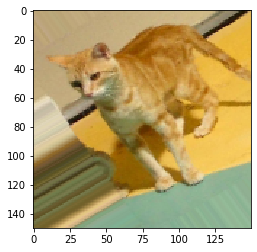

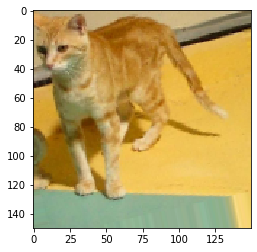

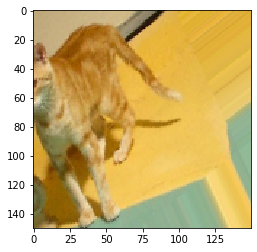

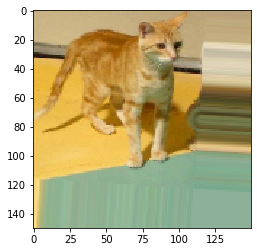

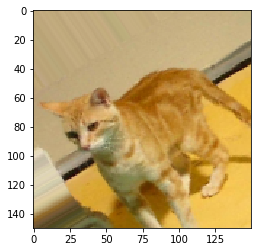

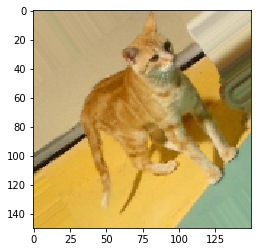

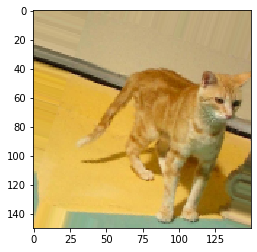

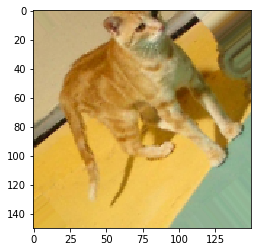

In [47]:
#visualize your images
from keras.preprocessing import image
fnames = [os.path.join(train_dir, 'cats', fname) for fname in os.listdir(os.path.join(train_dir, 'cats'))]
img = image.load_img(img_path, target_size=(150,150))
img_path = fnames[16]
x = image.img_to_array(img)
x=x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot=plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%8 == 0:
        break
plt.show()
        

In [49]:
#add dropout before the fully connected layer 
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', 
                        input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3,3), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D(2,2))
model2.add(layers.Conv2D(128, (3,3), activation='relu'))
model2.add(layers.MaxPooling2D(2,2))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', 
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [50]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=32, class_mode='binary')

Found 2000 images belonging to 2 classes.


In [52]:
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

Found 1000 images belonging to 2 classes.


In [53]:
history2 = model2.fit_generator(train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=50)

Epoch 1/100
 63/100 [=================>............] - ETA: 7s - loss: 0.6915 - acc: 0.5367

/home/local/ASUAD/ppaudyal/anaconda3/envs/tf3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/local/ASUAD/ppaudyal/anaconda3/envs/tf3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/home/local/ASUAD/ppaudyal/anaconda3/envs/tf3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/home/local/ASUAD/ppaudyal/anaconda3/envs/tf3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" %

100/100 [==============================] - 24s 236ms/step - loss: 0.6899 - acc: 0.5378 - val_loss: 0.7045 - val_acc: 0.4994
Epoch 2/100
100/100 [==============================] - 22s 223ms/step - loss: 0.6801 - acc: 0.5616 - val_loss: 0.6667 - val_acc: 0.5838
Epoch 3/100
100/100 [==============================] - 22s 219ms/step - loss: 0.6674 - acc: 0.5897 - val_loss: 0.6487 - val_acc: 0.6161
Epoch 4/100
100/100 [==============================] - 22s 223ms/step - loss: 0.6430 - acc: 0.6350 - val_loss: 0.6593 - val_acc: 0.6192
Epoch 5/100
100/100 [==============================] - 22s 215ms/step - loss: 0.6266 - acc: 0.6363 - val_loss: 0.6098 - val_acc: 0.6726
Epoch 6/100
100/100 [==============================] - 23s 227ms/step - loss: 0.6100 - acc: 0.6616 - val_loss: 0.6193 - val_acc: 0.6772
Epoch 7/100
100/100 [==============================] - 21s 213ms/step - loss: 0.5968 - acc: 0.6810 - val_loss: 0.6180 - val_acc: 0.6929
Epoch 8/100
100/100 [==============================] - 23s 2

Epoch 61/100
100/100 [==============================] - 22s 218ms/step - loss: 0.4077 - acc: 0.8169 - val_loss: 0.5494 - val_acc: 0.7526
Epoch 62/100
100/100 [==============================] - 22s 217ms/step - loss: 0.4006 - acc: 0.8262 - val_loss: 0.5046 - val_acc: 0.7709
Epoch 63/100
100/100 [==============================] - 22s 219ms/step - loss: 0.3983 - acc: 0.8144 - val_loss: 0.4751 - val_acc: 0.7938
Epoch 64/100
100/100 [==============================] - 21s 213ms/step - loss: 0.3960 - acc: 0.8156 - val_loss: 0.4628 - val_acc: 0.7964
Epoch 65/100
100/100 [==============================] - 21s 209ms/step - loss: 0.3858 - acc: 0.8216 - val_loss: 0.4975 - val_acc: 0.7912
Epoch 66/100
100/100 [==============================] - 22s 216ms/step - loss: 0.3964 - acc: 0.8147 - val_loss: 0.6209 - val_acc: 0.7410
Epoch 67/100
100/100 [==============================] - 21s 213ms/step - loss: 0.3776 - acc: 0.8288 - val_loss: 0.4847 - val_acc: 0.8109
Epoch 68/100
100/100 [===================

In [56]:
model2.save('cats_and_dogs_small_2.h5')

In [59]:
len(epochs)


30

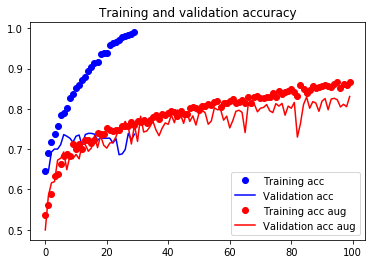

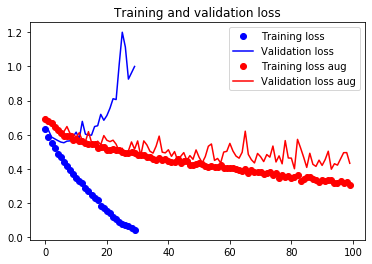

In [64]:
acc = history.history['acc']
acc_aug = history2.history['acc']
val_acc = history.history['val_acc']
val_acc_aug = history2.history['val_acc']
loss = history.history['loss']
loss_aug = history2.history['loss']
val_loss = history.history['val_loss']
val_loss_aug = history2.history['val_loss']

epochs = range(1, 100 +1 )
plt.plot (acc, 'bo', label='Training acc')
plt.plot (val_acc, 'b', label='Validation acc')
plt.plot( acc_aug, 'ro', label='Training acc aug')
plt.plot( val_acc_aug, 'r', label='Validation acc aug')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(loss, 'bo', label='Training loss')
plt.plot( val_loss, 'b', label='Validation loss')
plt.plot(loss_aug, 'ro', label='Training loss aug')
plt.plot(val_loss_aug, 'r', label='Validation loss aug')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [6]:
#transfer learning using vgg16
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet', 
                 include_top=False, 
                 input_shape=(150, 150,3))

58892288/58889256 [==============================] - 2s 0us/step


In [7]:
help(VGG16)

Help on function wrapper in module keras.applications:

wrapper(*args, **kwargs)



In [8]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [18]:
import os
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size=20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
                directory, 
                target_size=(150, 150),
                batch_size=batch_size,
                class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i*batch_size:(i+1)*batch_size] = features_batch
        labels[i*batch_size:(i+1)*batch_size] = labels_batch
        i += 1
        if i* batch_size >= sample_count:
            break
    return features, labels


In [28]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [34]:
#sanity check 
assert train_features.shape[1] == validation_features.shape[1]
assert train_features.shape[1] == test_features.shape[1]
assert train_features.shape[0] + test_features.shape[0] + validation_features.shape[0] == 4000

In [40]:
#build model
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer = optimizers.RMSprop(lr=2e-5), 
                 loss = 'binary_crossentropy', 
                 metrics = ['acc'])
    return model

In [41]:
model_with_convbase = build_model()

In [57]:
model_with_convbase.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


In [75]:
history_with_convbase = model_with_convbase.fit(train_features, train_labels, epochs=30, batch_size=20, validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 0s 224us/step - loss: 0.0200 - acc: 0.9980 - val_loss: 0.3090 - val_acc: 0.8830
Epoch 2/30
2000/2000 [==============================] - 0s 193us/step - loss: 0.0202 - acc: 0.9985 - val_loss: 0.3076 - val_acc: 0.8820
Epoch 3/30
2000/2000 [==============================] - 0s 192us/step - loss: 0.0177 - acc: 0.9995 - val_loss: 0.3134 - val_acc: 0.8870
Epoch 4/30
2000/2000 [==============================] - 0s 193us/step - loss: 0.0166 - acc: 1.0000 - val_loss: 0.3123 - val_acc: 0.8890
Epoch 5/30
2000/2000 [==============================] - 0s 192us/step - loss: 0.0172 - acc: 0.9990 - val_loss: 0.3133 - val_acc: 0.8870
Epoch 6/30
2000/2000 [==============================] - 0s 196us/step - loss: 0.0160 - acc: 0.9995 - val_loss: 0.3358 - val_acc: 0.8840
Epoch 7/30
2000/2000 [==============================] - 0s 205us/step - loss: 0.0137 - acc: 0.9995 - val_loss: 0.3191 - val_acc: 0.8840


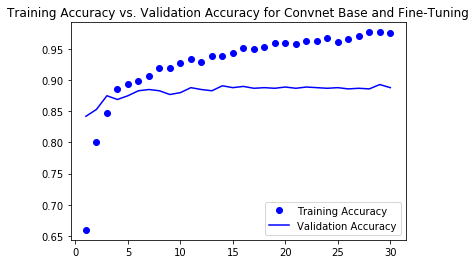

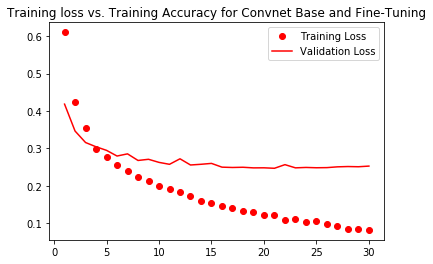

In [47]:
#plots 
acc = history_with_convbase.history['acc']
val_acc = history_with_convbase.history['val_acc']
loss = history_with_convbase.history['loss']
val_loss = history_with_convbase.history['val_loss']
xs = range(1, 30+1)
plt.plot(xs, acc, 'bo', label='Training Accuracy')
plt.plot(xs, val_acc, 'b-', label = 'Validation Accuracy')
plt.title('Training Accuracy vs. Validation Accuracy for Convnet Base and Fine-Tuning')
plt.legend()

plt.figure()
plt.plot(xs, loss, 'ro', label='Training Loss')
plt.plot(xs, val_loss, 'r-', label='Validation Loss')
plt.title('Training loss vs. Training Accuracy for Convnet Base and Fine-Tuning')
plt.legend()


In [54]:
#now moving on to extending the exisiting model and adding the new layers 
#redefine the model 
def build_model_extender():
    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    conv_base.trainable = False 
    return model

In [99]:
conv_base.trainable = False

In [ ]:
#define train / test generators with data augmentations
#init the ImageDataGenerator class
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40, 
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

test_datagen = ImageDataGenerator(
rescale=1./255)

#define the generator 
train_generator = train_datagen.flow_from_directory(
train_dir, 
target_size=(150, 150), 
batch_size=20, 
class_mode='binary')

validation_generator = test_datagen.flow_from_directory(test_dir, 
                                                       target_size=(150, 150),
                                                       batch_size=20,
                                                       class_mode='binary')

    

In [104]:
model_with_convbase_ext = build_model_extender()
model_with_convbase_ext.compile(optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'], loss='binary_crossentropy')

In [ ]:

history_with_convbase_ext = model_with_convbase_ext.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator)

In [ ]:
#plots 
acc = history_with_convbase_ext.history['acc']
val_acc = history_with_convbase_ext.history['val_acc']
loss = history_with_convbase_ext.history['loss']
val_loss = history_with_convbase_ext.history['val_loss']
xs = range(1, 30+1)
plt.plot(xs, acc, 'bo', label='Training Accuracy')
plt.plot(xs, val_acc, 'b-', label = 'Validation Accuracy')
plt.title('Training Accuracy vs. Validation Accuracy for Convnet Base and Fine-Tuning')
plt.legend()

plt.figure()
plt.plot(xs, loss, 'ro', label='Training Loss')
plt.plot(xs, val_loss, 'r-', label='Validation Loss')
plt.title('Training loss vs. Training Accuracy for Convnet Base and Fine-Tuning')
plt.legend()